In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [8]:
Unemployment_Dictionary = {"Beverage and Tobacco": "Beverage and Tobacco Unemployment Rate",                           
                           "Educational Services": "Educational Services Unemployment Rate",
                          "Food Services and Drinking Places": "Food Services and Drinking Places Unemployment Rate - LNU04034262",
                          "Health Care and Social Assistance": "Health Care and Social Assistance Unemployment Rate",
                          "Hospital": "Hospital Women Unemployment Rate - LNU04034244",
                          "Motion Picture and Sound Recording Industries":"Motion Picture and Sound Recording Industries Unemployment Rate - LNU04034179",
                          "Oil and Gas":"Oil and Gas Unemployment Rate",
                          "Professional and Technical Services":"Professional and Technical Services Unemployment Rate - LNU04034219",
                          "Real Estate and Rental and Leasing":"Real Estate and Rental and Leasing Unemployment Rate - LNU04034208",
                          "Insurance":"Insurance Unemployment Rate"}

In [9]:
for key, val in Unemployment_Dictionary.items():
    df = pd.read_csv(f"Resources/{val}.csv")
    df = df.loc[(df["Year"] == 2019) | (df["Year"] == 2020)]
    df = df[["Label","Value"]]
    df = df.rename(columns={"Label" : "Month",
                       "Value" : key})
    if key == "Beverage and Tobacco":
        industry_df = df
    else:
        industry_df = pd.merge(industry_df, df, on=["Month"], how="inner")
industry_df

,Month,Beverage and Tobacco,Educational Services,Food Services and Drinking Places,Health Care and Social Assistance,Hospital,Motion Picture and Sound Recording Industries,Oil and Gas,Professional and Technical Services,Real Estate and Rental and Leasing,Insurance
0,2019 Jan,5.2,5.3,6.5,2.4,1.0,6.2,5.3,2.9,3.2,1.9
1,2019 Feb,1.2,3.6,6.2,2.2,1.2,3.6,3.6,2.0,2.9,2.5
2,2019 Mar,1.5,3.6,5.9,2.2,1.7,9.9,3.6,1.8,3.5,2.0
3,2019 Apr,0.0,2.4,4.4,2.1,1.3,9.7,2.4,2.0,1.7,1.7
4,2019 May,0.3,5.0,5.3,2.3,1.4,8.5,5.0,2.7,1.9,1.0
5,2019 Jun,0.0,3.2,5.5,2.6,1.8,4.2,3.2,2.6,2.4,1.9
6,2019 Jul,1.1,2.3,5.9,2.3,1.1,5.7,2.3,2.4,2.2,1.6
7,2019 Aug,0.2,1.1,4.9,2.3,1.3,7.2,1.1,2.4,2.3,2.2
8,2019 Sep,1.9,1.7,4.6,2.2,1.4,8.9,1.7,2.5,2.2,2.0
9,2019 Oct,5.4,2.8,5.1,2.1,1.0,5.3,2.8,2.3,2.7,1.7


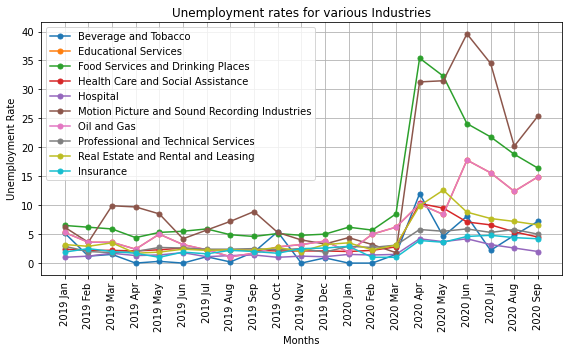

In [10]:
# Set plot size
plt.figure(figsize=(8,5))

# Generate line plots for each industry
for key, val in Unemployment_Dictionary.items():
    plt.plot(industry_df["Month"],industry_df[key],marker="o",markersize=5, label=key)

# Set the orientation of the x axis labels
plt.xticks(rotation="vertical")

# Adds a legend and sets its location to best
plt.legend(loc="best")

# Set title, x and y labels 
plt.xlabel("Months")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment rates for various Industries")

# Add in a grid for the chart
plt.grid()

# Save and Display the line plot
plt.tight_layout()
plt.savefig("Images/industry_lineplot.png")
plt.show()